In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

# 문제 정의
 - 농구 선수들의 경기 기록을 바탕으로 해당 선수들의 포지션을 예측
 - 2017년 NBA 농구 선수들의 게임 기록 데이터셋
 - 알고리즘 : Classification
 - 평가지표 : confusion matrix , precision , recall , f1 - score , accuracy 

# 데이터 수집

In [7]:
df = pd.read_csv('basketball_stat.csv')

## 데이터 탐색
 - 가설을 이용한 타당성 검증에 필요한 과정

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


- Player : 이름
- Pos : 포지션
- 3P : 한 경기 평균 3점슛 성공 횟수
- 2P : 한 경기 평균 2점슛 성공 횟수
- TRB : 한 경기 평균 리바운드 성공 횟수
- AST : 한 경기 평균 어시스트 성공 횟수
- STL : 한 경기 평균 스틸 성공 횟수
- BLK : 한 경기 평균 블록 성공 횟수

## 시각화를 통한 데이터 탐색
 - 포지션을 예측하는 문제.
 - 포지션 : C 와 SG만 존재
 - C 와 SG와 상관없다고 판단되는 feature 제거

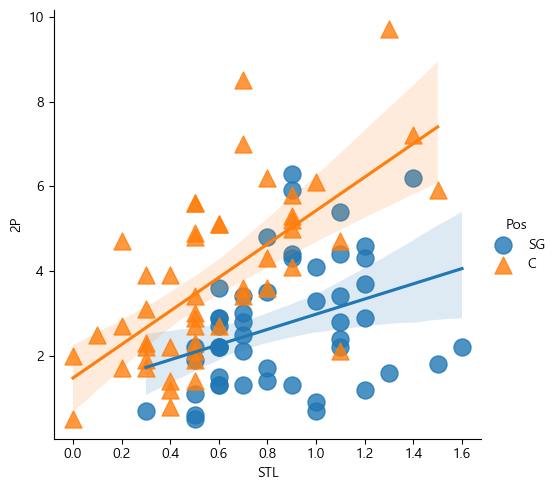

In [13]:
# 스틸과 2점슛 시각화

sns.lmplot(x = 'STL',y = '2P' , data = df , scatter_kws = {'s' : 150} , hue = 'Pos' , markers = ['o','^'])

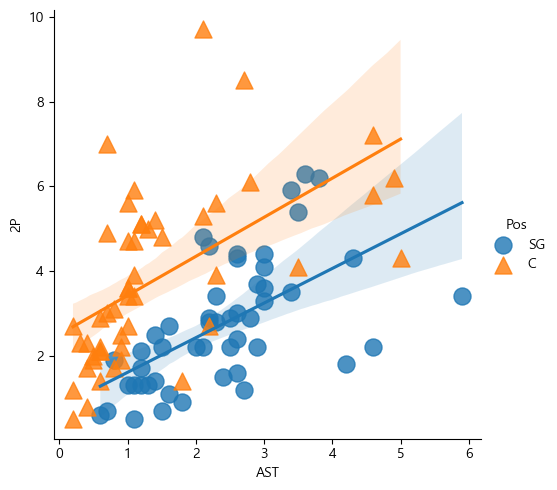

In [14]:
sns.lmplot(x = 'AST',y = '2P' , data = df , scatter_kws = {'s' : 150} , hue = 'Pos' , markers = ['o','^'])

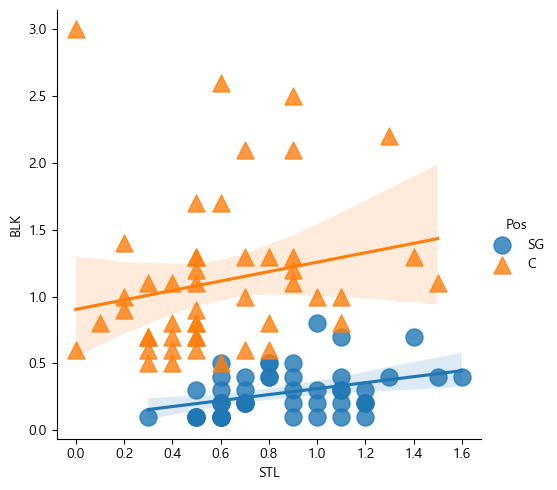

In [17]:
sns.lmplot(x = 'STL',y = 'BLK' , data = df , scatter_kws = {'s' : 150} , hue = 'Pos' , markers = ['o','^'])

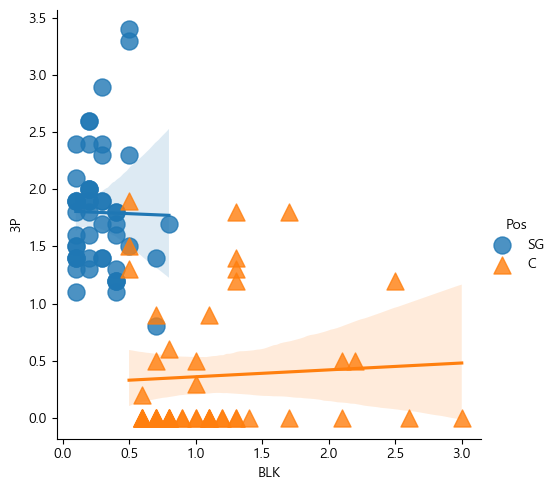

In [18]:
sns.lmplot(x = 'BLK',y = '3P' , data = df , scatter_kws = {'s' : 150} , hue = 'Pos' , markers = ['o','^'])

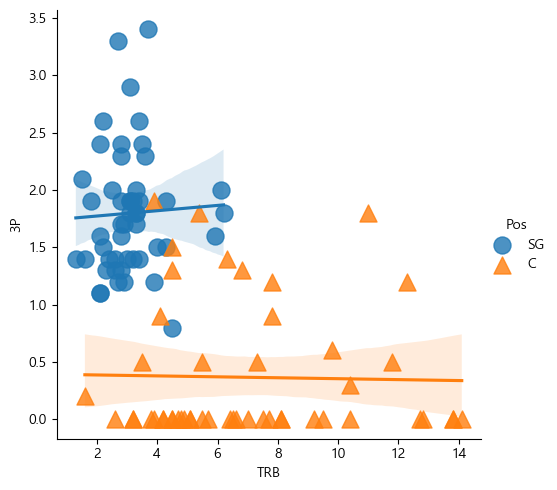

In [20]:
sns.lmplot(x = 'TRB',y = '3P' , data = df , scatter_kws = {'s' : 150} , hue = 'Pos' , markers = ['o','^'])

# 데이터 전처리
- 2점슛 , 어시스트 , 스틸은 C와 SG 분류에 도움이 되지 않음.

In [22]:
df.drop(['2P','AST','STL'] , axis = 1 , inplace = True)
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [24]:
x = df[['3P','TRB','BLK']]
y = df['Pos']

In [25]:
x.shape , y.shape

((100, 3), (100,))

## 최적의 K 찾기

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score

# 교차검증
# k의 범위는 학습 데이터의 절반을 사용
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [47]:
max_range = x_train.shape[0]//2
k_list = []

for i in range(3,37 , 2):
    k_list.append(i)
    
cross_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn , x_train , y_train.values.ravel() , cv = 10 , scoring = 'accuracy')
    cross_scores.append(scores.mean())

cross_scores

[0.9125,
 0.9125,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.9375,
 0.9125,
 0.925,
 0.9125,
 0.8875,
 0.9,
 0.875,
 0.8625,
 0.85,
 0.8375]

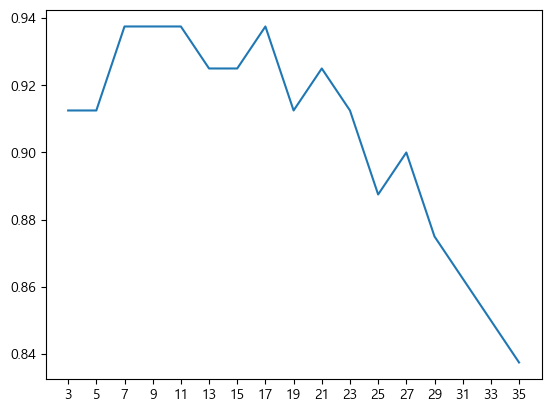

In [53]:
plt.plot(k_list , cross_scores)
plt.xticks(k_list , np.arange(3,36,2))
plt.show()

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
kn = KNeighborsClassifier(n_neighbors = 7)
kn.fit(x_train,y_train)
accuracy_score(y_test , kn.predict(x_test))

0.85

In [64]:
pd.DataFrame({'prediction' : kn.predict(x_test) , 'actural' : y_test})

,prediction,actural
26,SG,SG
86,SG,SG
2,C,C
55,SG,SG
75,C,C
93,C,C
16,C,C
73,C,SG
54,SG,C
95,C,C
